# Pi Day - Search Trend Exploratory Analysis

This project analyzes Google Trends data to explore search trends related to Pi Day, pizza, and pie from 2020 to 2024."
"The goal was to see search trends around pi day, and if there were any correlations between the searches for different foods, and pi.

##Install Libraries

Python libraries pandas, matplotlib, seaborn, and pytrends were used for data processing and visualization. I have utilized these libraries before to store data and process visualizations.

In [ ]:
!pip install pandas matplotlib seaborn google-trends-api pytrends praw backoff # Added backoff to the installation list
from IPython import get_ipython
from IPython.display import display
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import praw
import time
import backoff

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for google-trends-api: filename=google_trends_api-2.2.6-py3-none-any.whl size=6116 sha256=b6c4c848dfd4bc8e9de46b450d1b8812360f187738cba085ed90cf92072d39cd
  Stored in directory: /root/.cache/pip/wheels/22/6e/6b/7c3a7b95d61ae0ccb3992af631d46d0120a768dd6a04414d51
Successfully built google-trends-api


In [ ]:
# Initialize pytrends with your location and timezone
pytrends = TrendReq(hl='en-US', tz=360)

# Define the search keywords
kw_list = ["pizza", "Pi Day", "Pie"]


In [ ]:
# Build the payload for the search request
# cat=0 means all categories, timeframe='today 5-y' means last 5 years, geo='' means worldwide
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
trends_data = pytrends.interest_over_time()
trends_data = trends_data.drop(columns=['isPartial'])



/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


## Vizualizing Search Trends for Pi Day and Related Terms

As part of onf of=

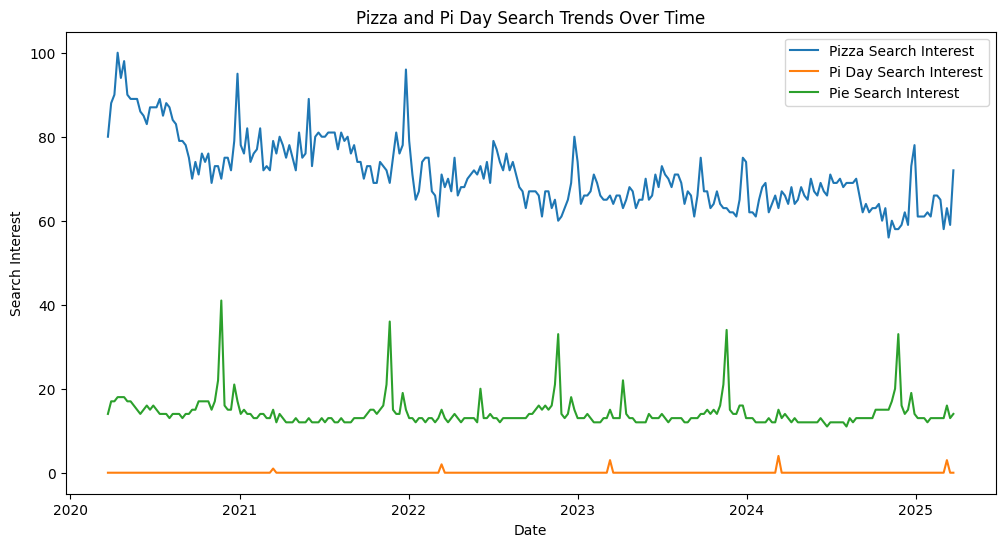

In [ ]:
# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot the pizza search interest over time
plt.plot(trends_data['pizza'], label='Pizza Search Interest')

# Plot the Pi Day search interest over time
plt.plot(trends_data['Pi Day'], label='Pi Day Search Interest')

plt.plot(trends_data['Pie'], label='Pie Search Interest')


# Set the title of the plot
plt.title('Pizza and Pi Day Search Trends Over Time')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Search Interest')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


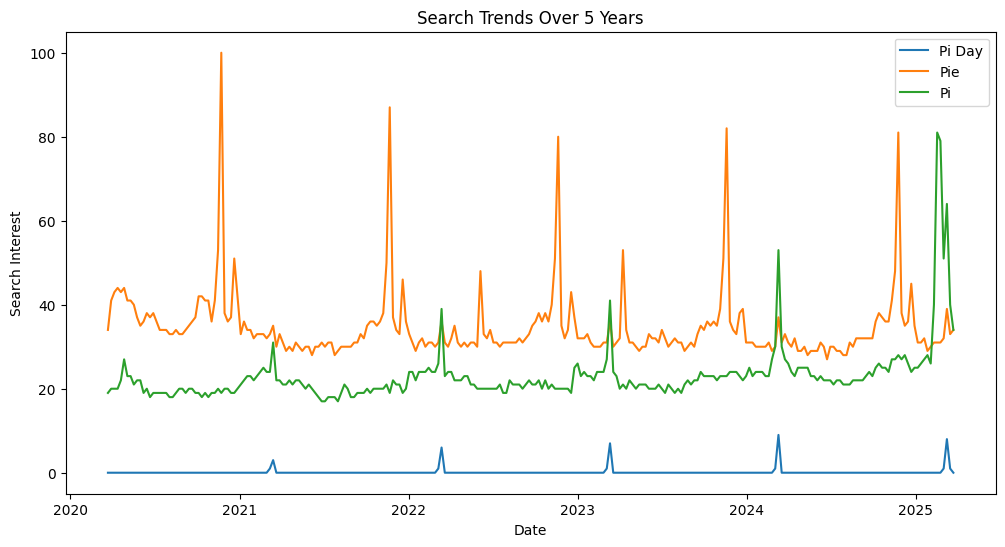

In [ ]:
 #--- General Search Trends ---
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Pi Day", "Pie", "Pi"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
trends_data = pytrends.interest_over_time()
trends_data = trends_data.drop(columns=['isPartial'])

plt.figure(figsize=(12, 6))
plt.plot(trends_data['Pi Day'], label='Pi Day')
plt.plot(trends_data['Pie'], label='Pie')
plt.plot(trends_data['Pi'], label='Pi')
plt.title('Search Trends Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.show()

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Pi Day", "Pie", "Pi", "Pizza", "Pizza Pie"]  # Added "Pizza" and "Pizza Pie"
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
trends_data = pytrends.interest_over_time()
trends_data = trends_data.drop(columns=['isPartial'])



/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


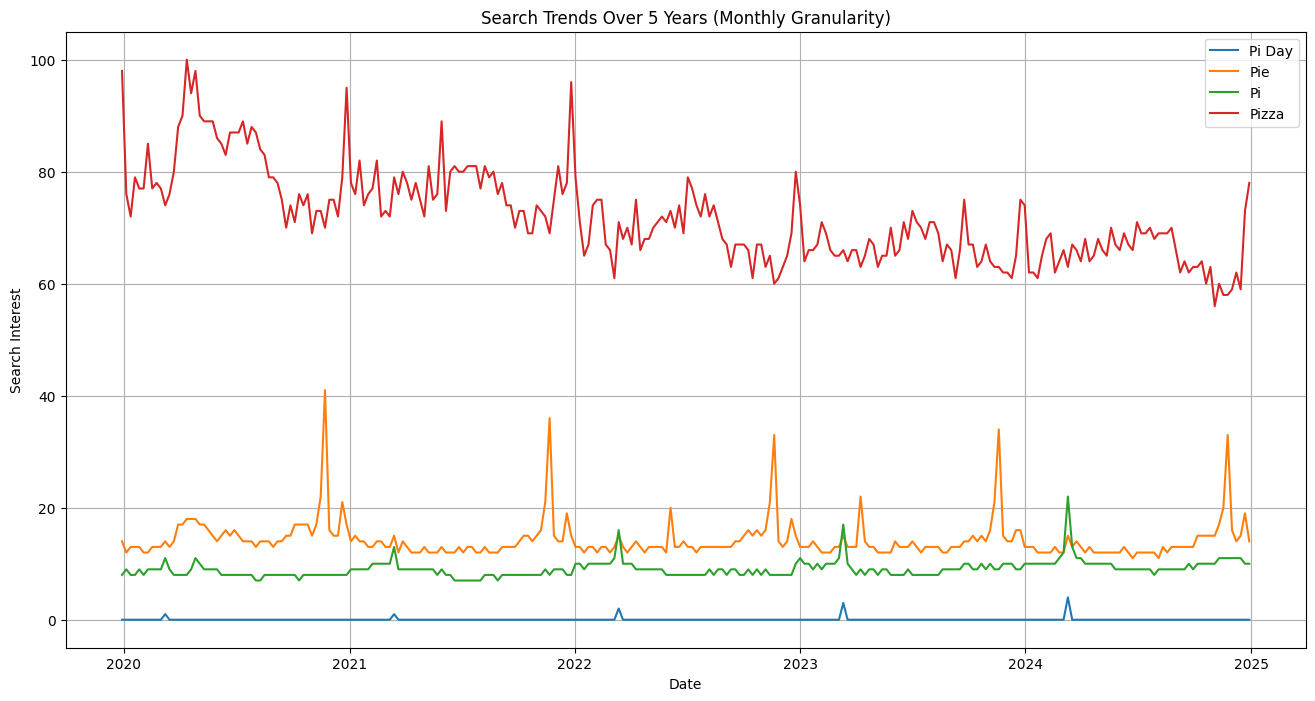


Top 5 Days for Pizza (Combined) Searches:
date
2020-04-12    100
2019-12-29     98
2020-04-26     98
2021-12-26     96
2020-12-27     95
Name: Pizza Searches, dtype: int64

Top 5 Days for Pie Searches:
date
2020-11-22    41
2021-11-21    36
2023-11-19    34
2022-11-20    33
2024-11-24    33
Name: Pie, dtype: int64

Top 5 Days for Pi Searches:
date
2024-03-10    22
2023-03-12    17
2022-03-13    16
2021-03-14    13
2024-03-17    13
Name: Pi, dtype: int64


In [ ]:
# Combine "Pizza" and "Pizza Pie" trends
trends_data['Pizza Searches'] = trends_data['Pizza'] + trends_data['Pizza Pie']

plt.figure(figsize=(16, 8))  # Increased figure size for better readability
plt.plot(trends_data['Pi Day'], label='Pi Day')
plt.plot(trends_data['Pie'], label='Pie')
plt.plot(trends_data['Pi'], label='Pi')
plt.plot(trends_data['Pizza Searches'], label='Pizza')  # Plot combined pizza trend
plt.title('Search Trends Over 5 Years (Monthly Granularity)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True) #Added grid for easier reading.
plt.show()

# --- Most Popular Days for Pizza and Pie Searches ---
pizza_pie_trends = trends_data[['Pizza Searches', 'Pie', 'Pi']]

# Find the days with the highest search interest
top_pizza_days = pizza_pie_trends['Pizza Searches'].nlargest(5)
top_pie_days = pizza_pie_trends['Pie'].nlargest(5)
top_pi_days = pizza_pie_trends['Pi'].nlargest(5)

print("\nTop 5 Days for Pizza (Combined) Searches:")
print(top_pizza_days)

print("\nTop 5 Days for Pie Searches:")
print(top_pie_days)

print("\nTop 5 Days for Pi Searches:")
print(top_pi_days)


Top Day for Pi, Pizza, and Pie Searches in 2020:
  Pi: 2020-04-26, Count: 11
  Pizza (Combined): 2020-04-12, Count: 100
  Pie: 2020-11-22, Count: 41

Top Day for Pi, Pizza, and Pie Searches in 2021:
  Pi: 2021-03-14, Count: 13
  Pizza (Combined): 2021-12-26, Count: 96
  Pie: 2021-11-21, Count: 36

Top Day for Pi, Pizza, and Pie Searches in 2022:
  Pi: 2022-03-13, Count: 16
  Pizza (Combined): 2022-12-25, Count: 80
  Pie: 2022-11-20, Count: 33

Top Day for Pi, Pizza, and Pie Searches in 2023:
  Pi: 2023-03-12, Count: 17
  Pizza (Combined): 2023-09-24, Count: 75
  Pie: 2023-11-19, Count: 34

Top Day for Pi, Pizza, and Pie Searches in 2024:
  Pi: 2024-03-10, Count: 22
  Pizza (Combined): 2024-12-29, Count: 78
  Pie: 2024-11-24, Count: 33


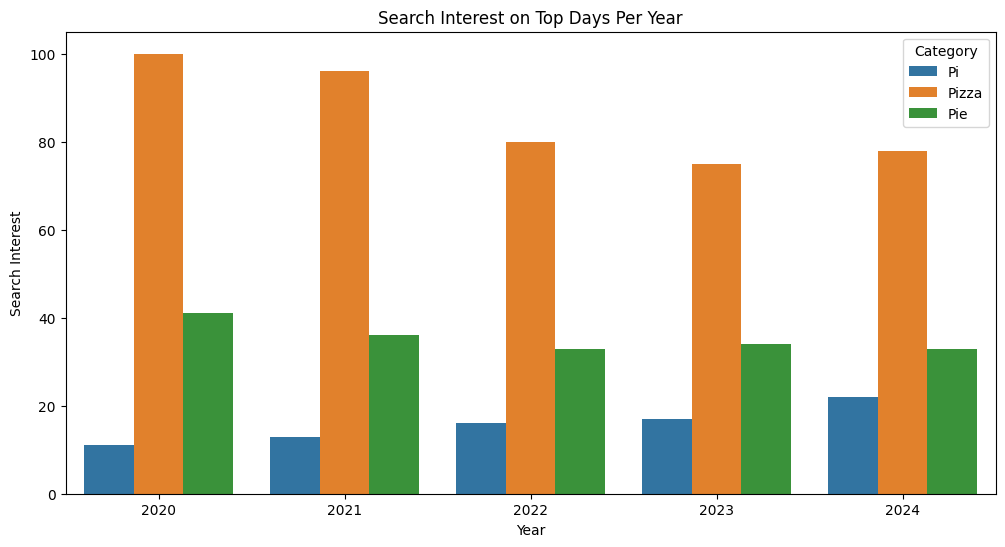

In [ ]:
# --- Most Popular Days Per Year and Counts ---
years = range(2020, 2025)
top_days_data = [] #list to hold data for visualization.
for year in years:
    year_data = trends_data[trends_data.index.year == year]

    top_pi_days = year_data['Pi'].nlargest(1)
    top_pizza_days = year_data['Pizza Searches'].nlargest(1)
    top_pie_days = year_data['Pie'].nlargest(1)

    print(f"\nTop Day for Pi, Pizza, and Pie Searches in {year}:")
    if not top_pi_days.empty:
        pi_date = top_pi_days.index[0].strftime('%Y-%m-%d')
        pi_count = top_pi_days.iloc[0]
        print(f"  Pi: {pi_date}, Count: {pi_count}")
        top_days_data.append({'Year': year, 'Category': 'Pi', 'Date': pi_date, 'Count': pi_count})
    else:
        print(f"  Pi: No data")

    if not top_pizza_days.empty:
        pizza_date = top_pizza_days.index[0].strftime('%Y-%m-%d')
        pizza_count = top_pizza_days.iloc[0]
        print(f"  Pizza (Combined): {pizza_date}, Count: {pizza_count}")
        top_days_data.append({'Year': year, 'Category': 'Pizza', 'Date': pizza_date, 'Count': pizza_count})
    else:
        print(f"  Pizza (Combined): No data")

    if not top_pie_days.empty:
        pie_date = top_pie_days.index[0].strftime('%Y-%m-%d')
        pie_count = top_pie_days.iloc[0]
        print(f"  Pie: {pie_date}, Count: {pie_count}")
        top_days_data.append({'Year': year, 'Category': 'Pie', 'Date': pie_date, 'Count': pie_count})
    else:
        print(f"  Pie: No data")

# --- Visualization of Top Days Data ---
top_days_df = pd.DataFrame(top_days_data)
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Category', data=top_days_df)
plt.title('Search Interest on Top Days Per Year')
plt.ylabel('Search Interest')
plt.show()

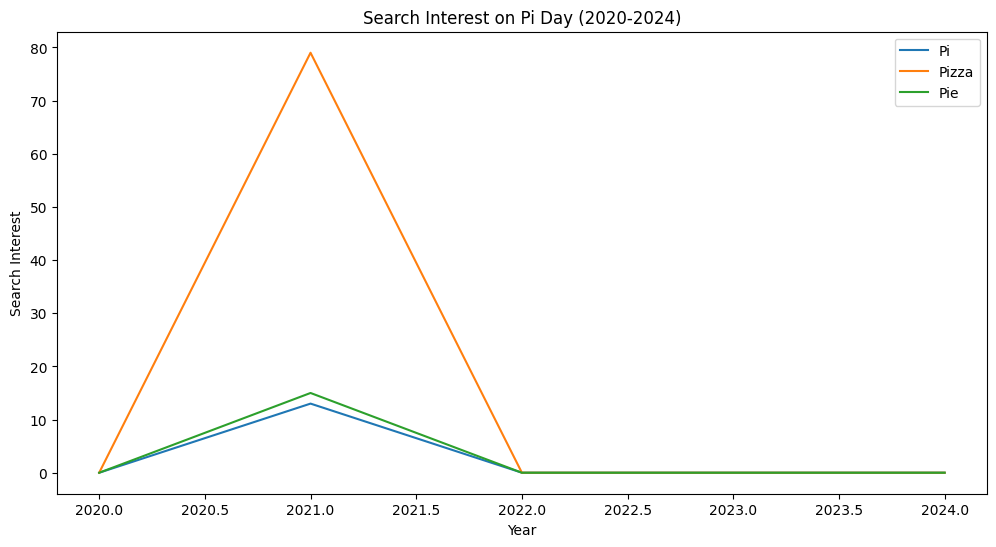

In [ ]:
# --- Pi Day Search Change Visualization ---
pi_day_changes = []
for year in years:
    pi_day_date = pd.to_datetime(f'{year}-03-14')
    if pi_day_date in trends_data.index:
        pi_day_data = trends_data.loc[pi_day_date]
        pi_day_changes.append({
            'Year': year,
            'Pi': pi_day_data['Pi'],
            'Pizza': pi_day_data['Pizza Searches'],
            'Pie': pi_day_data['Pie']
        })
    else:
        pi_day_changes.append({'Year':year, 'Pi':0, 'Pizza':0, 'Pie':0})

pi_day_changes_df = pd.DataFrame(pi_day_changes)
pi_day_changes_df = pi_day_changes_df.set_index('Year')

plt.figure(figsize=(12, 6))
plt.plot(pi_day_changes_df['Pi'], label='Pi')
plt.plot(pi_day_changes_df['Pizza'], label='Pizza')
plt.plot(pi_day_changes_df['Pie'], label='Pie')
plt.title('Search Interest on Pi Day (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Search Interest')
plt.legend()
plt.show()

# Pi Day Social Media Activity

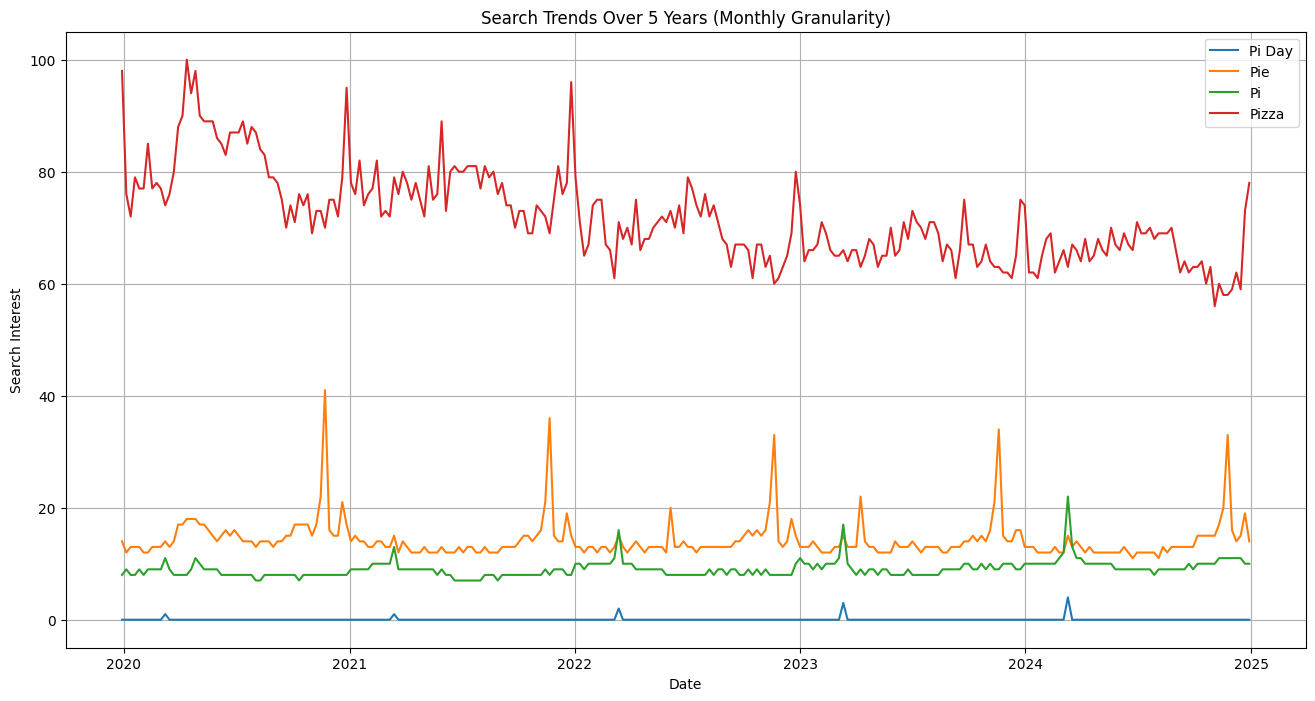

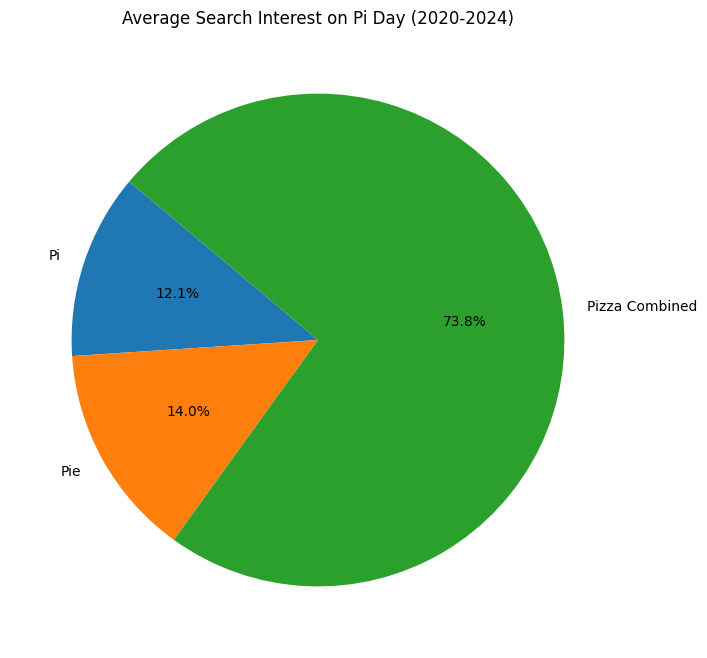

In [ ]:
# Google Trends Visualization
plt.figure(figsize=(16, 8))
plt.plot(trends_data['Pi Day'], label='Pi Day')
plt.plot(trends_data['Pie'], label='Pie')
plt.plot(trends_data['Pi'], label='Pi')
plt.plot(trends_data['Pizza Combined'], label='Pizza')
plt.title('Search Trends Over 5 Years (Monthly Granularity)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.show()

# --- Pie Chart for Pi Day Search Interest ---

pi_day_data = trends_data[trends_data.index.day == 14]
pi_day_data = pi_day_data[pi_day_data.index.month == 3]

avg_pi_day_interest = pi_day_data[['Pi', 'Pie', 'Pizza Combined']].mean()

plt.figure(figsize=(8, 8))
plt.pie(avg_pi_day_interest, labels=avg_pi_day_interest.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Search Interest on Pi Day (2020-2024)')
plt.show()
